In [5]:
from ising_model import PairwiseIsingModelInferencer, PairwiseIsingModel, ConfigurationIterator
import numpy as np

In [6]:
n_sites = 12
ising_model = PairwiseIsingModel(n_sites)
ising_model.J = np.random.rand(n_sites, n_sites)
ising_model.H = np.random.rand(n_sites)

inferencer = PairwiseIsingModelInferencer(ising_model)
inferencer.update_partition_function()

In [7]:
n_samples = 10000
observation_dataset = np.random.randint(0, 2, (n_samples, n_sites))

In [8]:
from ising_trainer import PairwiseIsingModelTrainer
from tqdm import tqdm
total_epoches = 200
trainer = PairwiseIsingModelTrainer(ising_model, inferencer)
loss_record = []
pbar = tqdm(total=total_epoches, desc="Training", unit="epoch")

def on_epoch_end(ctx):
    epoch = ctx.epoch
    epochs = ctx.epochs
    loss = ctx.loss
    kl_loss = ctx.kl_loss
    l2_loss = ctx.l2_loss
    
    pbar.set_description(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, KL: {kl_loss:.4f}, L2: {l2_loss:.4f}")
    pbar.update(1) 
    loss_record.append(loss)

trained_model = trainer.train(observation_dataset, epochs=total_epoches, learning_rate=0.01, epoch_callback=on_epoch_end)



Epoch 84/200, Loss: 14.5297, KL: 14.4395, L2: 0.0903:  42%|▍| 84/200 [03:30<04:5

ch 1/200, Loss: 183.3864, KL: 102.8927, L2: 80.4937:   0%| | 0/200 [00:00<?, 
ch 1/200, Loss: 183.3864, KL: 102.8927, L2: 80.4937:   0%| | 1/200 [00:00<00:
ch 2/200, Loss: 179.1296, KL: 98.6378, L2: 80.4918:   0%| | 1/200 [00:00<00:4
ch 2/200, Loss: 179.1296, KL: 98.6378, L2: 80.4918:   1%| | 2/200 [00:00<00:3
ch 3/200, Loss: 174.8716, KL: 94.3830, L2: 80.4886:   1%| | 2/200 [00:00<00:3
ch 3/200, Loss: 174.8716, KL: 94.3830, L2: 80.4886:   2%| | 3/200 [00:00<00:3
ch 4/200, Loss: 170.6115, KL: 90.1282, L2: 80.4832:   2%| | 3/200 [00:00<00:3
ch 4/200, Loss: 170.6115, KL: 90.1282, L2: 80.4832:   2%| | 4/200 [00:00<00:3
ch 5/200, Loss: 166.3479, KL: 85.8738, L2: 80.4741:   2%| | 4/200 [00:00<00:3
ch 5/200, Loss: 166.3479, KL: 85.8738, L2: 80.4741:   2%| | 5/200 [00:00<00:3
ch 6/200, Loss: 162.0785, KL: 81.6198, L2: 80.4587:   2%| | 5/200 [00:01<00:3
ch 6/200, Loss: 162.0785, KL: 81.6198, L2: 80.4587:   3%| |

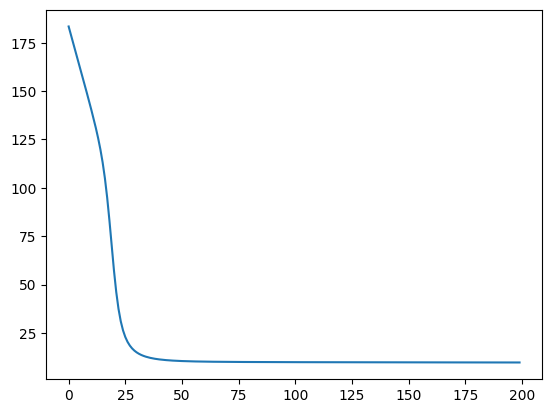

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(total_epoches), loss_record)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_alignment(observation_dataset, inferencer):
    """Plot alignment between observation averages and model averages."""
    n_sites = observation_dataset.shape[1]

    # Compute observation averages
    essembly_average_obs_sisj = np.einsum('ki,kj->ij', observation_dataset, observation_dataset) / observation_dataset.shape[0]
    essembly_average_obs_si = np.mean(observation_dataset, axis=0)

    # Compute model averages
    essembly_average_model_sisj = inferencer.essembly_average_sisj()
    essembly_average_model_si = inferencer.essembly_average_si()

    # Flatten the pairwise correlation matrices for plotting
    obs_sisj_flat = essembly_average_obs_sisj.flatten()
    model_sisj_flat = essembly_average_model_sisj.flatten()

    # Plot pairwise correlations
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(obs_sisj_flat, model_sisj_flat, alpha=0.5)
    plt.plot([0, 1], [0, 1], 'r--')  # y = x line
    plt.xlabel("Observation $\langle s_i s_j \\rangle_{\\text{obs}}$")
    plt.ylabel("Model $\langle s_i s_j \\rangle_{\\text{model}}$")
    plt.title("Pairwise Correlations Alignment")
    plt.xlim([0.,1.])
    plt.ylim([0.,1.])
    
    # Plot single-site averages
    plt.subplot(1, 2, 2)
    plt.scatter(essembly_average_obs_si, essembly_average_model_si, alpha=0.5)
    plt.plot([0, 1], [0, 1], 'r--')  # y = x line
    plt.xlabel("Observation $\langle s_i \\rangle_{\\text{obs}}$")
    plt.ylabel("Model $\langle s_i \\rangle_{\\text{model}}$")
    plt.title("Single-Site Averages Alignment")

    plt.tight_layout()
    plt.xlim([0.,1.])
    plt.ylim([0.,1.])

<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:37: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:37: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_33822/1655776466.py:26: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("Observation $\langle s_i s_j \\rangle_{\\text{obs}}$")
/tmp/ipykernel_33822/1655776466.py:27: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("Model $\langle s_i s_j \\rangle_{\\text{model}}$")
/tmp/ipykernel_33822/1655776466.py:36: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("Observation $\langle s_i \\rangle_{\\text{obs}}$")
/tmp/ipykernel_33822/1655776466.py:37: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("Model $\langle s_i \\rangle_{\\text{model}}$")


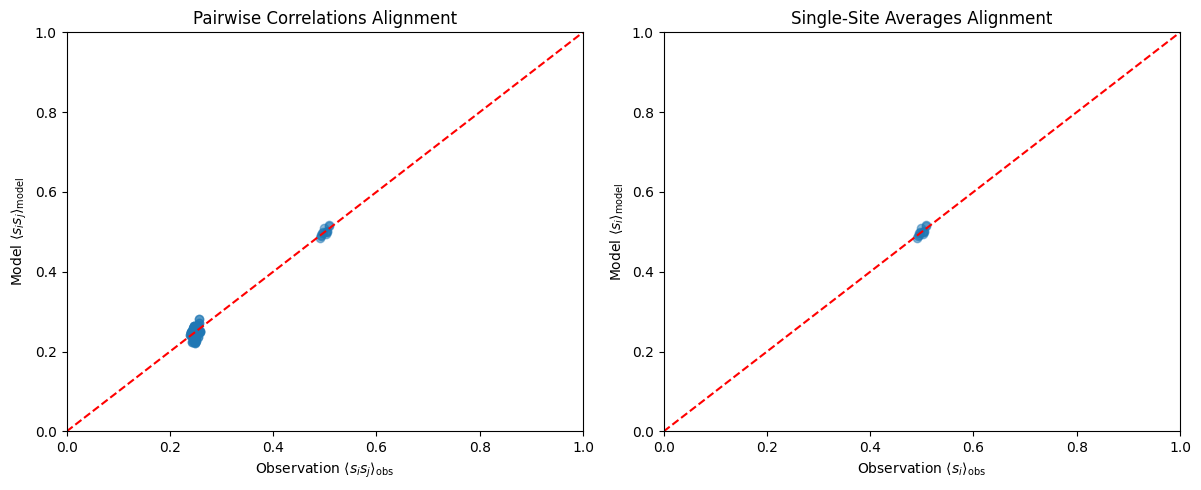

In [12]:
plot_alignment(observation_dataset, inferencer)


In [68]:
configuration_size = 10
dummay_microstate_sequence = np.random.randint(1, 5, (12 * 100))
dummay_microstate_sequence
n_samples_per_site = 48

In [69]:
def generate_observation_samples(target_id, sequence, n_samples_per_site = 10):
    T = len(sequence)
    results = np.zeros((T - n_samples_per_site, n_samples_per_site))
    for t in range(T - n_samples_per_site):
        v = sequence[t: t + n_samples_per_site]
        v[v != target_id] = 0
        v[v == target_id] = 1
        results[t] = v
    return results.reshape((-1, n_sites,n_samples_per_site))
results = generate_observation_samples(2, dummay_microstate_sequence, 48)
results.shape

(96, 12, 48)

In [70]:
results2 = np.array(results)
results2 = np.transpose(results2, axes=[0, 2, 1])
results2.shape
treshhold = 0.5
new_results2 = (np.sum(results2, axis=2) > treshhold).astype(int)
new_results2 = new_results2.reshape((-1, n_sites, n_samples_per_site))
new_results2.shape

(8, 12, 48)

In [71]:
n_models = results.shape[0]
layer_id = 0
treshhold = 0.5

import numpy as np

def pad_data(results, n_sites, n_samples_per_site):
    """Pad the results array to make its size divisible by n_sites * n_samples_per_site."""
    total_elements = results.size
    target_size = (total_elements // (n_sites * n_samples_per_site) + 1) * n_sites * n_samples_per_site
    pad_size = target_size - total_elements

    if pad_size > 0:
        # Pad with zeros
        results = np.pad(results.flatten(), (0, pad_size), mode='constant').reshape(-1, n_sites, n_samples_per_site)
    else:
        # No padding needed
        results = results.reshape(-1, n_sites, n_samples_per_site)

    return results
    
while n_models > 1:
    print(f"layer_id = {layer_id}. models = {n_models}")
    for model_id in tqdm(range(n_models)):
        obs_data = results[model_id].T
        ising_model = PairwiseIsingModel(n_sites)
        ising_model.J = np.random.rand(n_sites, n_sites)
        ising_model.H = np.random.rand(n_sites)
        
        inferencer = PairwiseIsingModelInferencer(ising_model)
        inferencer.update_partition_function()
    
        total_epoches = 1
        trainer = PairwiseIsingModelTrainer(ising_model, inferencer)
        
        # pbar = tqdm(total=total_epoches, desc="Training", unit="epoch")
        
        def on_epoch_end(ctx):
            epoch = ctx.epoch
            epochs = ctx.epochs
            loss = ctx.loss
            kl_loss = ctx.kl_loss
            l2_loss = ctx.l2_loss
            
            # pbar.set_description(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, KL: {kl_loss:.4f}, L2: {l2_loss:.4f}")
            # pbar.update(1) 
        
        trained_model = trainer.train(obs_data, epochs=total_epoches, learning_rate=0.01, epoch_callback=on_epoch_end)
    # to next layer of larger sacle.
    ## cluster n_site sites into onsite by reduce a configuration to {0 / 1} with a treshold
    ### obs_data is in shape (n_models_this_layer, n_ising_sites, n_ising_configuration)
    results = np.transpose(results, axes=[0, 2, 1]) ## to (n_models_this_layer, n_ising_configuration, n_ising_sites)
    results = (np.sum(results, axis=2) > treshhold).astype(int) # clustering n_sites sites to on site. # shape = (n_models_this_layer, n_ising_configuration) 
    results = pad_data(results, n_sites, n_samples_per_site) 

    results = results.reshape((-1, n_sites, n_samples_per_site)) # split sites for training next layer's ising models. 

    n_models = results.shape[0]
    layer_id += 1

layer_id = 0. models = 96


100%|███████████████████████████████████████████| 96/96 [00:19<00:00,  5.02it/s]


layer_id = 1. models = 9


100%|█████████████████████████████████████████████| 9/9 [00:01<00:00,  5.21it/s]
